In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

models:
   * LogisticRegression 20->80, 15->78
   * DecisionTreeClassifier 20->76, 15->76
   * RandomForestClassifier 20->85, 15->84
   * xgb
   * adaBoost
   * voting
   * stacking

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [14]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y = df_train['label'] #target
x = df_train.drop(['label'], axis=1).to_numpy() #data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

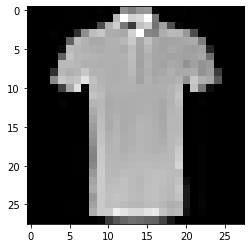

In [131]:
img = X_train[1].reshape(28,28)
plt.imshow(img, plt.cm.gray)
plt.show()

In [153]:
def pipe(model):
    pipeline = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=15)),
                        ('mod', model)])
    
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)   

In [154]:
pipe(LogisticRegression())

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7842222222222223

In [156]:
pipe(DecisionTreeClassifier())

0.7575555555555555

In [157]:
pipe(RandomForestClassifier())

0.8453888888888889

In [158]:
pipe(AdaBoostClassifier(random_state=70, n_estimators=200, learning_rate=0.2, algorithm='SAMME'))

0.5505

In [101]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

In [102]:
pipeline_xgb = Pipeline([('scaler5', StandardScaler()),
                        ('pca5', PCA(n_components=10)),
                        ('xgb', xgb_model)])

In [106]:
#pipeline_xgb.fit(X_train, y_train)
#pipeline_xgb.score(X_test, y_test)

In [76]:
estimators = [('lr', LogisticRegression()),
              ('dt', DecisionTreeClassifier(),
               ('rf', RandomForestClassifier())
              )]

In [78]:
pipeline_stack = Pipeline([('scaler4', StandardScaler()),
                        ('pca4', PCA(n_components=10)),
                        ('stack', StackingClassifier(estimators=estimators))])

In [124]:
#pipeline_stack.fit(X_train, y_train)
#pipeline_stack.score(X_test, y_test)

In [159]:
pipeline_voting = Pipeline([('scaler4', StandardScaler()),
                        ('pca4', PCA(n_components=10)),
                        ('stack', StackingClassifier(estimators=estimators))])

SyntaxError: unexpected EOF while parsing (<ipython-input-159-0b425439c80f>, line 5)

In [126]:
pipeline_voting.fit(X_train, y_train)
pipeline_voting.score(X_test, y_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: too many values to unpack (expected 2)

In [146]:
pca = PCA(n_components=16)
X_train_reduced = pca.fit_transform(X_train)

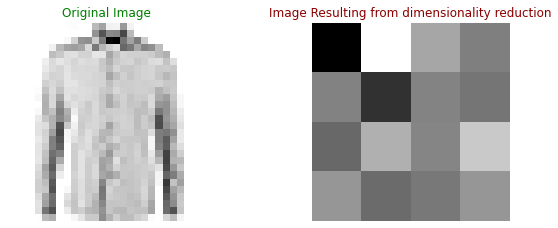

In [149]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(X_test[1].reshape(28,28), cmap="gist_yarg")
plt.title("Original Image", color = "green")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(X_train_reduced[1].reshape(4,4), cmap="gist_yarg")
plt.title("Image Resulting from dimensionality reduction", color = "Darkred")
plt.axis("off")
plt.show()